In [148]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [180]:
pd_avocado=pd.read_csv('Avocado.csv')
pd_avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [181]:
pd_avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [150]:
pd_avocado.describe

<bound method NDFrame.describe of       Unnamed: 0        Date  AveragePrice  Total Volume      4046       4225  \
0              0  27-12-2015          1.33      64236.62   1036.74   54454.85   
1              1  20-12-2015          1.35      54876.98    674.28   44638.81   
2              2  13-12-2015          0.93     118220.22    794.70  109149.67   
3              3  06-12-2015          1.08      78992.15   1132.00   71976.41   
4              4  29-11-2015          1.28      51039.60    941.48   43838.39   
...          ...         ...           ...           ...       ...        ...   
1512          10  16-10-2016          1.39     190846.01  57529.11   56366.66   
1513          11  09-10-2016          1.51     178235.75  43325.87   52189.61   
1514          12  02-10-2016          1.48     178410.82  46364.75   52893.38   
1515          13  25-09-2016          1.47     189131.52  54110.79   53593.58   
1516          14  18-09-2016          1.43     182978.30  43116.41   54193.

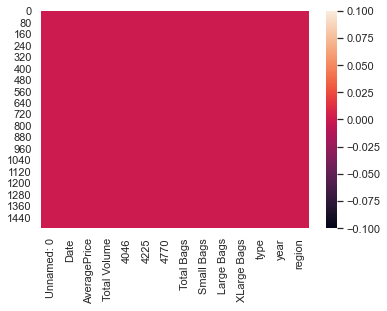

In [151]:
sns.heatmap(pd_avocado.isnull())

In [152]:
pd_avocado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

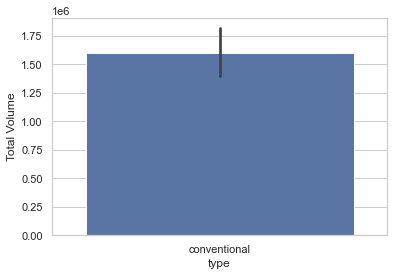

In [153]:
sns.barplot(x='type', y='Total Volume', data=pd_avocado)
plt.show()

      Unnamed: 0        Date  AveragePrice  Total Volume      4046       4225  \
0              0  27-12-2015          1.33      64236.62   1036.74   54454.85   
1              1  20-12-2015          1.35      54876.98    674.28   44638.81   
2              2  13-12-2015          0.93     118220.22    794.70  109149.67   
3              3  06-12-2015          1.08      78992.15   1132.00   71976.41   
4              4  29-11-2015          1.28      51039.60    941.48   43838.39   
...          ...         ...           ...           ...       ...        ...   
1512          10  16-10-2016          1.39     190846.01  57529.11   56366.66   
1513          11  09-10-2016          1.51     178235.75  43325.87   52189.61   
1514          12  02-10-2016          1.48     178410.82  46364.75   52893.38   
1515          13  25-09-2016          1.47     189131.52  54110.79   53593.58   
1516          14  18-09-2016          1.43     182978.30  43116.41   54193.42   

          4770  Total Bags 

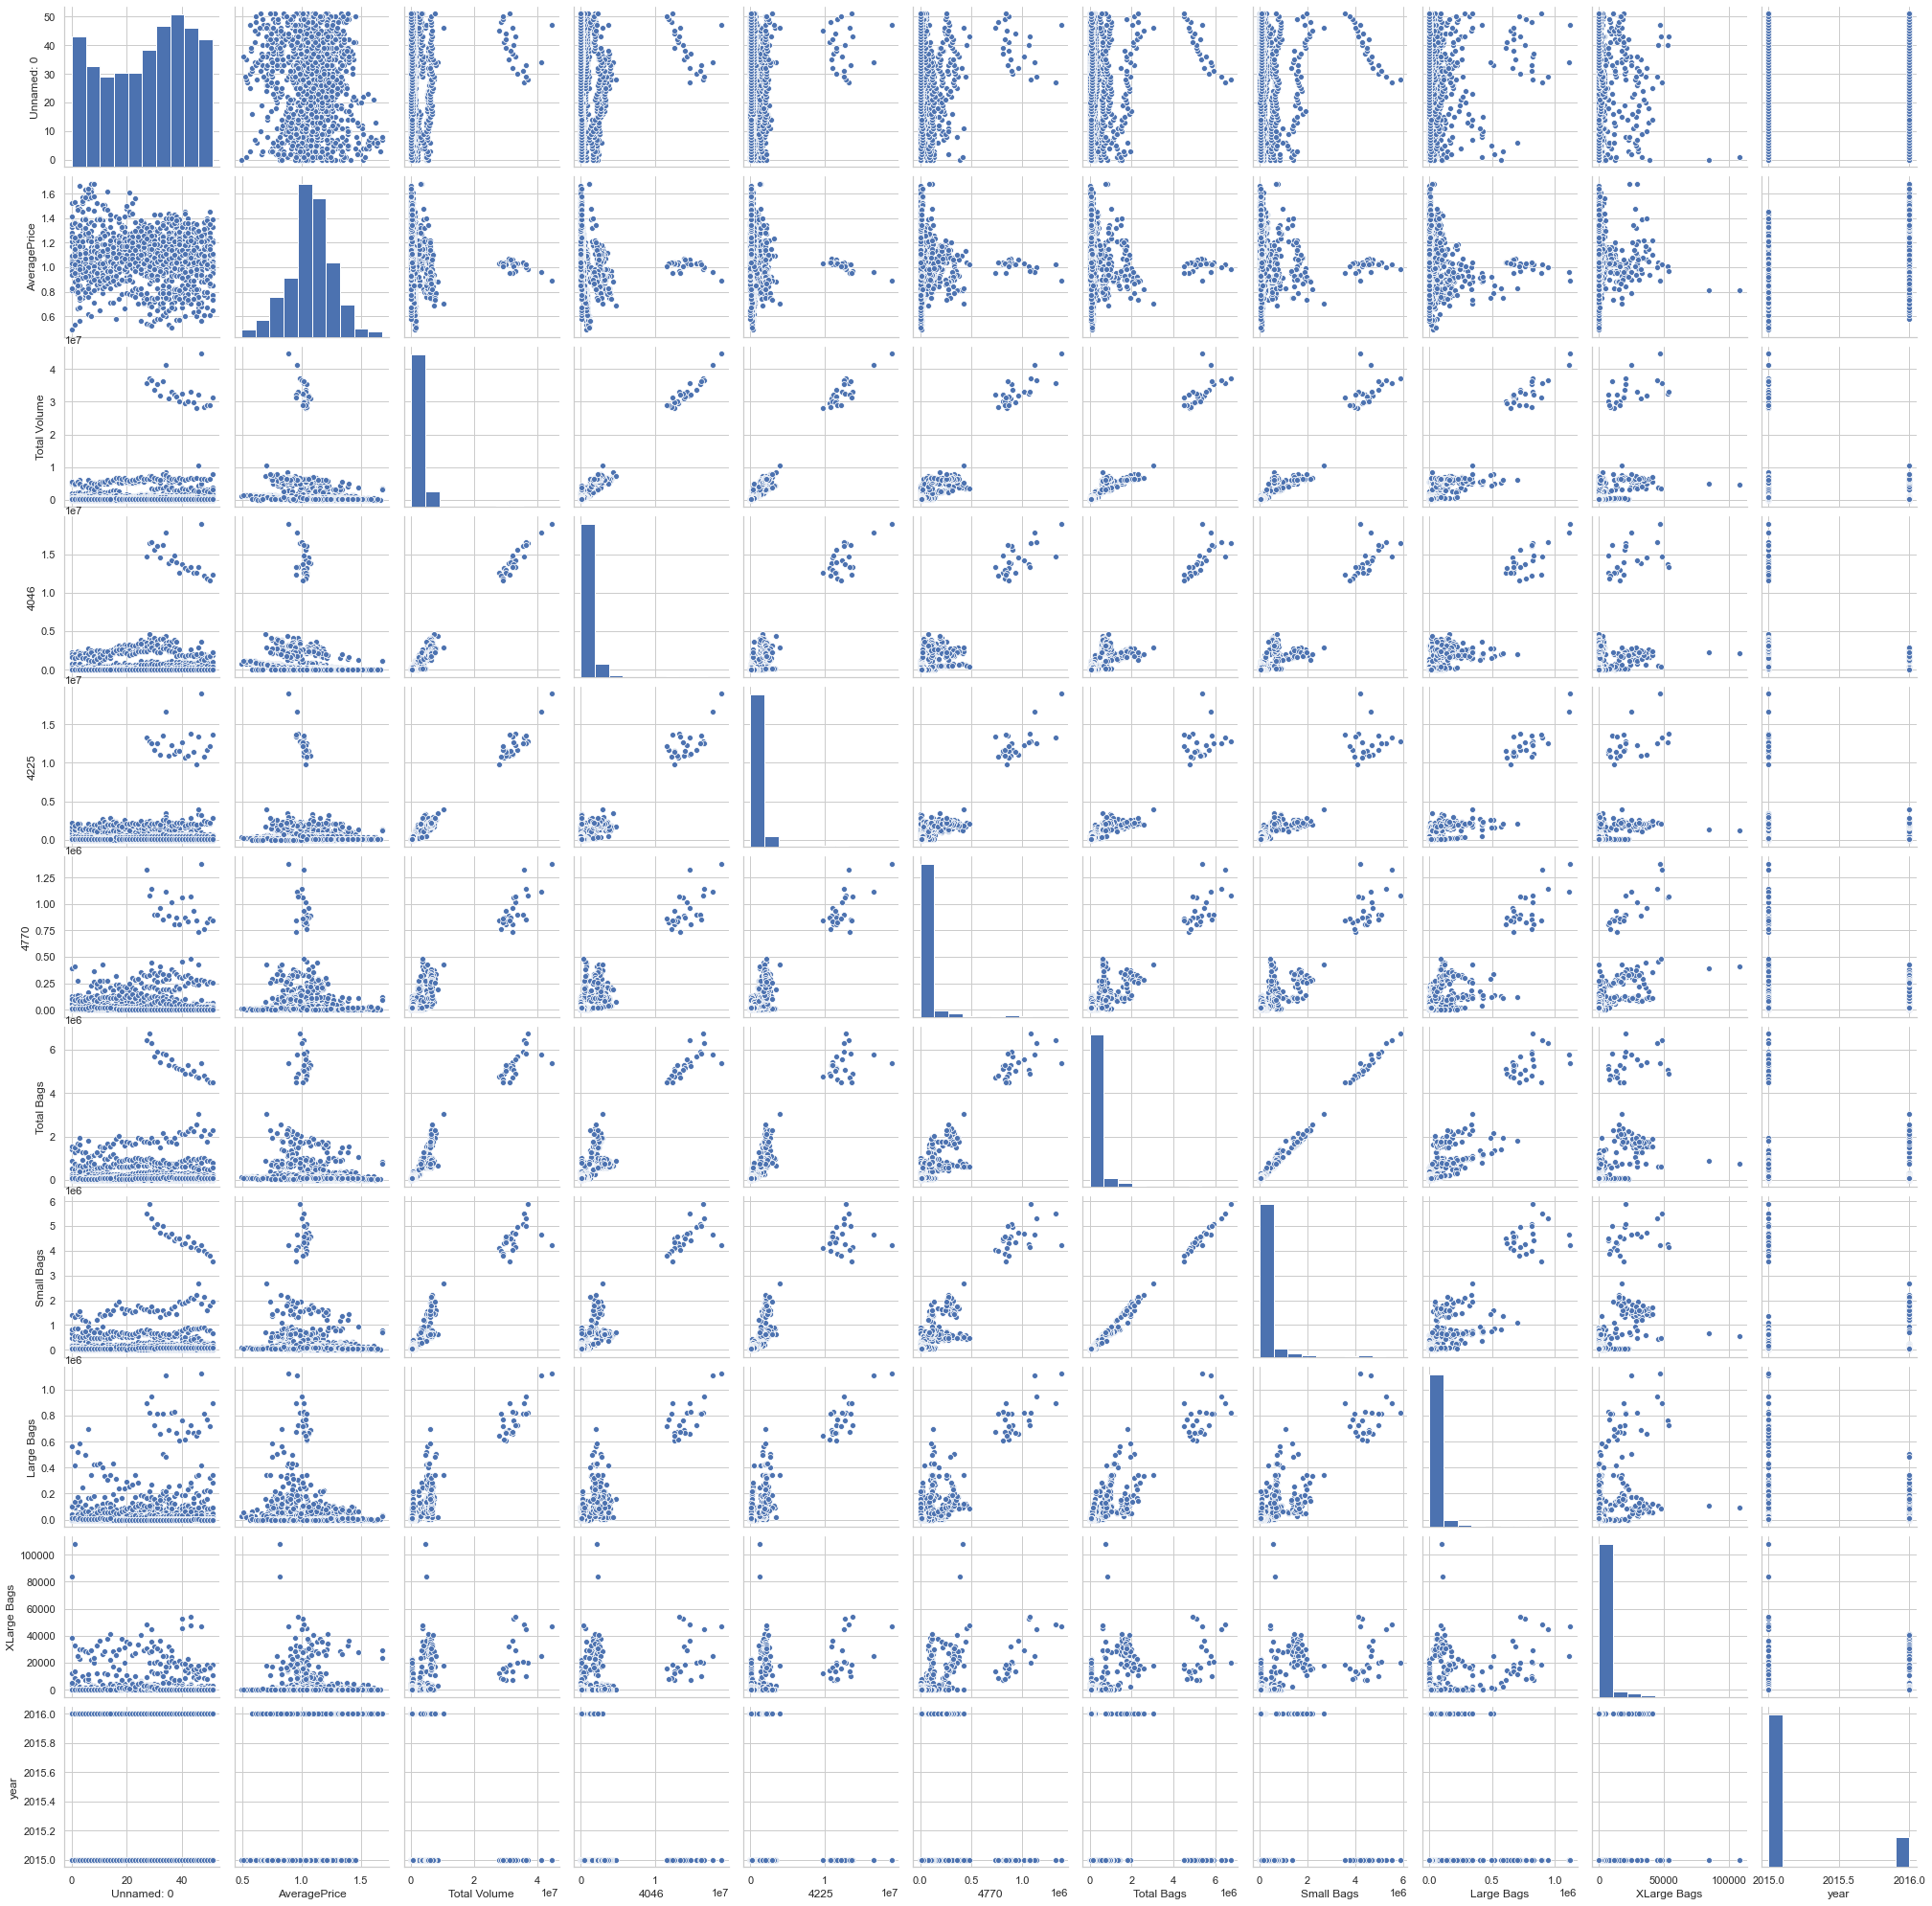

In [154]:
ds=pd.DataFrame(data=pd_avocado)
print(ds)
sns.pairplot(ds)

In [155]:
pd_avocado.shape

(1517, 14)

In [156]:
pd_avocado.info

<bound method DataFrame.info of       Unnamed: 0        Date  AveragePrice  Total Volume      4046       4225  \
0              0  27-12-2015          1.33      64236.62   1036.74   54454.85   
1              1  20-12-2015          1.35      54876.98    674.28   44638.81   
2              2  13-12-2015          0.93     118220.22    794.70  109149.67   
3              3  06-12-2015          1.08      78992.15   1132.00   71976.41   
4              4  29-11-2015          1.28      51039.60    941.48   43838.39   
...          ...         ...           ...           ...       ...        ...   
1512          10  16-10-2016          1.39     190846.01  57529.11   56366.66   
1513          11  09-10-2016          1.51     178235.75  43325.87   52189.61   
1514          12  02-10-2016          1.48     178410.82  46364.75   52893.38   
1515          13  25-09-2016          1.47     189131.52  54110.79   53593.58   
1516          14  18-09-2016          1.43     182978.30  43116.41   54193.42

In [157]:
pd_avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [158]:
pd_cor=pd_avocado.corr()
pd_cor

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.075531,0.091934,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,-0.012854
AveragePrice,-0.075531,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,0.091934,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,0.092013,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,0.093566,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,0.075647,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,0.081007,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,0.083485,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,0.065364,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.050993,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342


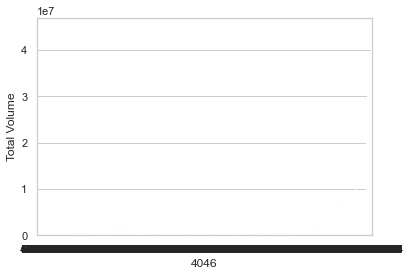

In [159]:
sns.barplot(x=pd_avocado['4046'], y=pd_avocado['Total Volume'], data=pd_avocado)
plt.show()

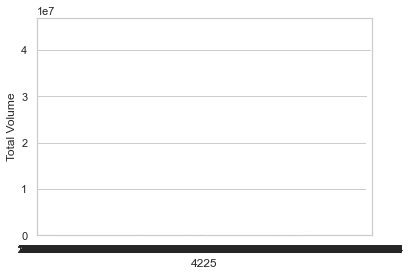

In [160]:
sns.barplot(x=pd_avocado['4225'], y=pd_avocado['Total Volume'], data=pd_avocado)
plt.show()

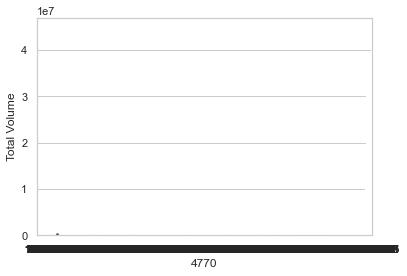

In [161]:
sns.barplot(x=pd_avocado['4770'], y=pd_avocado['Total Volume'], data=pd_avocado)
plt.show()

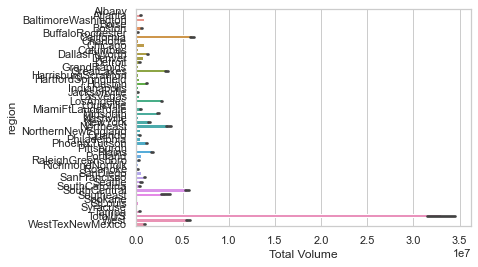

In [162]:
sns.barplot(y='region', x='Total Volume', data=pd_avocado)
plt.show()

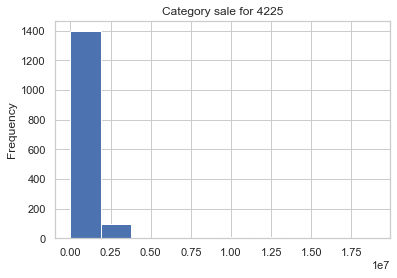

In [163]:
pd_avocado['4225'].plot.hist(bins=10)
plt.title('Category sale for 4225')
plt.show()

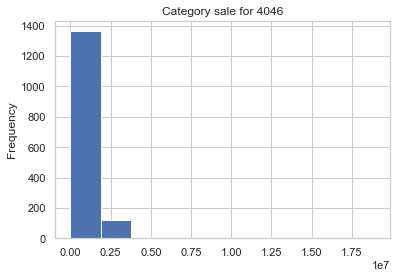

In [164]:
pd_avocado['4046'].plot.hist(bins=10)
plt.title('Category sale for 4046')
plt.show()

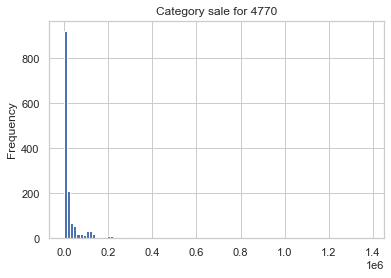

In [165]:
pd_avocado['4770'].plot.hist(bins=100)
plt.title('Category sale for 4770')
plt.show()

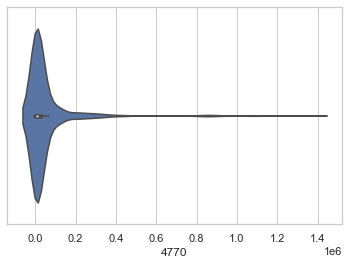

In [166]:
sns.set(style='whitegrid')
sns.violinplot(pd_avocado['4770'])
plt.show()

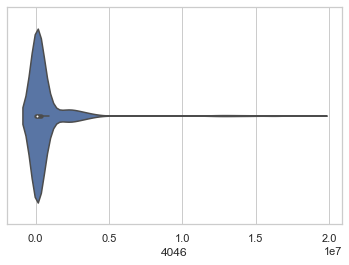

In [167]:
sns.set(style='whitegrid')
sns.violinplot(pd_avocado['4046'])
plt.show()

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
pd_avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [170]:
pd_avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [171]:
pd_avocado=pd_avocado.drop(['Date','Unnamed: 0'], axis=1)


In [172]:
pd_avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [173]:
Data_categorial=pd_avocado[['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags','XLarge Bags', 'year' ]].copy()

In [174]:
Data_numerical=pd_avocado[['type', 'region']].copy()

In [175]:
Data_categorial.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015


In [176]:
Data_numerical.head()

,type,region
0,conventional,Albany
1,conventional,Albany
2,conventional,Albany
3,conventional,Albany
4,conventional,Albany


In [177]:
Data_numerical=pd.get_dummies(Data_numerical)
Data_numerical.head()

,type_conventional,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
pd_avocado_final=pd.concat([Data_numerical,Data_categorial], axis=1)
pd_avocado_final.head()

,type_conventional,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,...,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1,1,0,0,0,0,0,0,0,0,...,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1,1,0,0,0,0,0,0,0,0,...,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,1,1,0,0,0,0,0,0,0,0,...,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1,1,0,0,0,0,0,0,0,0,...,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1,1,0,0,0,0,0,0,0,0,...,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
target = pd_avocado['region']
X = pd_avocado.drop('region', axis = 1)
#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.4, random_state=100)
#Create the model and train
model = RandomForestClassifier()
model.fit(X_train,y_train)
#predict the results for test
test_pred = model.predict(X_test)
#test the accuracy
accuracy_score(y_test, test_pred)